# pandas - part1 - DataFrameとSeries

* `import pandas as pd` を記述してpandasをインポートする
* `pd.DataFrame`関数によってDataFrame（表データ）を作成する
* `pd.Series`関数によってSeries（列データなどの一連のデータ）を作成する

> pandasではExcelのような１つの表データをDataFrameと呼びます。DataFrameを構成する１つの列データをSeriesと呼びます。

## DataFrame

In [45]:
import pandas as pd

data = {"id": [1, 2, 3, 4], 
        "title": ["Python Book", "HTML Book", "PHP Book", "Hello English"], 
        "price": [3000, 1000, 2000, 2000], 
        "category": ["Programming", "Programming", "Programming", "English"]}
df = pd.DataFrame(data)
df

,id,title,price,category
0,1,Python Book,3000,Programming
1,2,HTML Book,1000,Programming
2,3,PHP Book,2000,Programming
3,4,Hello English,2000,English


* `pd.DataFrame` の引数にディクショナリデータを渡すことでDataFrameを生成できる
* Jupyter Notebook（Google Cloab）上でCellの最終行においてDataFrameを返すと表を表示できる

In [46]:
df.count()

id          4
title       4
price       4
category    4
dtype: int64

In [47]:
 df.max()

id                    4
title       Python Book
price              3000
category    Programming
dtype: object

In [48]:
df.describe()

,id,price
count,4.000000,4.000000
mean,2.500000,2000.000000
std,1.290994,816.496581
min,1.000000,1000.000000
25%,1.750000,1750.000000
50%,2.500000,2000.000000
75%,3.250000,2250.000000
max,4.000000,3000.000000


* `DataFrame` には `count`関数や、`max`関数などデータを要約する関数が用意されている
* `DataFrame` の `describe` 関数によって件数、最大値、標準偏差、最小値、パーセンタイル、最大値を表示できる

> データを眺めるときは、一つひとつの細かな部分に注目する前に、データの傾向や全体像を確認するようにします。

## DataFrameとSeries

In [49]:
s = df["price"]
s

0    3000
1    1000
2    2000
3    2000
Name: price, dtype: int64

In [50]:
s.sum()

8000

In [51]:
s.describe()

count       4.000000
mean     2000.000000
std       816.496581
min      1000.000000
25%      1750.000000
50%      2000.000000
75%      2250.000000
max      3000.000000
Name: price, dtype: float64

* `DataFrame` に対してキーを指定して列データ（ `Series` ）にアクセスできる
* `Series` も `DataFrame` と同様に様々な関数が用意されている

In [52]:
taxes = [300, 100, 200, 200]
s = pd.Series(taxes, name="tax")
s

0    300
1    100
2    200
3    200
Name: tax, dtype: int64

* `pd.Series` によって列データを生成できる

In [53]:
df["tax"] = s
df

,id,title,price,category,tax
0,1,Python Book,3000,Programming,300
1,2,HTML Book,1000,Programming,100
2,3,PHP Book,2000,Programming,200
3,4,Hello English,2000,English,200


* DataFrameに`Series`を追加できる

> DataFrameには `Series`以外にもスカラー値やリスト、NumPy配列なども追加できます。

In [54]:
df["price_with_tax"] = df["price"] + df["tax"]
df

,id,title,price,category,tax,price_with_tax
0,1,Python Book,3000,Programming,300,3300
1,2,HTML Book,1000,Programming,100,1100
2,3,PHP Book,2000,Programming,200,2200
3,4,Hello English,2000,English,200,2200


* 既存の`DataFrame` （ `Series` ）から新たな`Series`を追加できる

In [55]:
df[["id", "title"]]

,id,title
0,1,Python Book
1,2,HTML Book
2,3,PHP Book
3,4,Hello English


* `DataFrame` に複数のキーを指定して新たな`DataFrame`を作成できる

> 結果が `Series` ではなく `DataFeame` となる点に注意します。

## インデックス

In [56]:
data = {"id": [1, 2, 3], "title": ["Python Book", "HTML Book", "PHP Book"], "price": [3000, 1000, 2000]}
df = pd.DataFrame(data)
df

,id,title,price
0,1,Python Book,3000
1,2,HTML Book,1000
2,3,PHP Book,2000


In [57]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [58]:
df.index == 1

array([False,  True, False])

In [59]:
df[df.index == 1]

,id,title,price
1,2,HTML Book,1000


In [60]:
df.iloc[1]

id               2
title    HTML Book
price         1000
Name: 1, dtype: object

In [61]:
df2 = df.set_index("id")
df2

,title,price
id,,
1,Python Book,3000
2,HTML Book,1000
3,PHP Book,2000


In [62]:
df2.index

Int64Index([1, 2, 3], dtype='int64', name='id')

In [63]:
df2.index == 1

array([ True, False, False])

In [64]:
df2[df2.index == 1]

,title,price
id,,
1,Python Book,3000


# pandas - part2 - データの表示

* `DataFrame` オブジェクトにキー（カラム名）を指定して列を選択できる
* `DataFrame` オブジェクトに条件（bool値のリスト）を指定して行を選択できる
* `DataFrame`の `loc` プロパティ、`iloc` プロパティで必要なデータにアクセスできる


In [65]:
import pandas as pd

data = {"id": [1, 2, 3, 4], 
        "title": ["Python Book", "HTML Book", "PHP Book", "Hello English"], 
        "price": [3000, 1000, 2000, 2000], 
        "category": ["Programming", "Programming", "Programming", "English"]}
books = pd.DataFrame(data)
books

,id,title,price,category
0,1,Python Book,3000,Programming
1,2,HTML Book,1000,Programming
2,3,PHP Book,2000,Programming
3,4,Hello English,2000,English


## 列の選択

In [66]:
books[["title", "price"]]

,title,price
0,Python Book,3000
1,HTML Book,1000
2,PHP Book,2000
3,Hello English,2000


* `books` 変数（`DataFrame` オブジェクト） に列名のリストを指定して表示する列を選択できる


In [67]:
books[["title", "price"]].shape

(4, 2)

* DataFrame` の `shape` プロパティでデータの形状を確認できる

## 行の選択

In [68]:
books["price"] == 2000

0    False
1    False
2     True
3     True
Name: price, dtype: bool

* `DataFrame` に列名を指定すると `Series` を取得できる
* 取得した `Series` に対して比較演算子で条件式を作ると `bool` 値のはリストになる

In [69]:
books[books["price"] == 2000]

,id,title,price,category
2,3,PHP Book,2000,Programming
3,4,Hello English,2000,English


* `DataFrame` オブジェクトのキー `bool` 値のはリストを指定すると行選択できる

### 行の選択 - 複雑な条件指定

In [70]:
books[books["price"].isin([1000, 3000])]

,id,title,price,category
0,1,Python Book,3000,Programming
1,2,HTML Book,1000,Programming


* `DataFrame` の `isin` メソッドで複数の値と比較できる

In [71]:
books[(books["price"] == 1000) | (books["price"] == 3000)]

,id,title,price,category
0,1,Python Book,3000,Programming
1,2,HTML Book,1000,Programming


* `|` 演算子で or 条件を定義できる
> `|` 演算子や `&` 演算子はもともとビット演算を行う演算子です。pandasでこれらを使う場合 `()` を使って評価の優先度を上げる必要があります。

In [72]:
books[(books["price"] == 1000) & (books["category"] == "Programming")]

,id,title,price,category
1,2,HTML Book,1000,Programming


* `&` 演算子を使って and 条件を定義できる

In [73]:
books_1000 = books[books["price"] == 1000]
books_1000[books_1000["category"] == "Programming"]

,id,title,price,category
1,2,HTML Book,1000,Programming


* 段階的に条件を指定して同様の条件（and条件）を表現することもできる

## `loc` プロパティと `iloc` プロパティ

In [74]:
books

,id,title,price,category
0,1,Python Book,3000,Programming
1,2,HTML Book,1000,Programming
2,3,PHP Book,2000,Programming
3,4,Hello English,2000,English


In [75]:
[books["price"] >= 2000]

[0     True
 1    False
 2     True
 3     True
 Name: price, dtype: bool]

In [76]:
books.loc[books["price"] >= 2000, ["title", "price"]]

,title,price
0,Python Book,3000
2,PHP Book,2000
3,Hello English,2000


* locプロパティはラベル（列名）を使ってデータにアクセスする

> `loc`プロパティ、`iloc`プロパティには、行と列を指定する2つのリストデータを受け取ります。1つ目のリストデータ（この場合、`books["price"] >= 2000`）は行を指定するためのもので、2つ目のリストデータ（この場合、`["title", "price"]`）は列を指定するためのものです。

In [77]:
books.iloc[[0, 2], 1:3]

,title,price
0,Python Book,3000
2,PHP Book,2000


* locプロパティは列番号を使ってデータにアクセスする

# pandas - part3 - CSVファイルの処理

* `pandas` にはCSVファイルなどの様々な形式のデータを読み込むメソッドが用意されている
* `pd.read_csv` メソッドでCSVファイルを `DataDrame` として読み込むことができる
* `DataFrame`の `to_csv` メソッドで `DataFrame` をCSVファイルとして出力できる

In [78]:
!wget https://gist.githubusercontent.com/murayama333/7498728296525a789ceb9df00c48f29f/raw/fdf91f8c44b03303cbf821be654428a5d51d4301/books.csv

--2021-01-04 02:45:38--  https://gist.githubusercontent.com/murayama333/7498728296525a789ceb9df00c48f29f/raw/fdf91f8c44b03303cbf821be654428a5d51d4301/books.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114 [text/plain]
Saving to: ‘books.csv’

books.csv           100%[===================>]     114  --.-KB/s    in 0s      

2021-01-04 02:45:38 (4.67 MB/s) - ‘books.csv’ saved [114/114]



* `wget` コマンドでWEB上で公開されているCSVファイルをダウンロードする

In [85]:
!cat books.csv

ID,Title,Price,Category
1,Python Book,3000,PG
2,HTML Book,1000,PG
3,PHP Book,2000,PG
4,Hello English,1000,English


* `cat` コマンドで `books.csv` の内容を確認する

In [86]:
import pandas as pd
books = pd.read_csv("books.csv")
books

,ID,Title,Price,Category
0,1,Python Book,3000,PG
1,2,HTML Book,1000,PG
2,3,PHP Book,2000,PG
3,4,Hello English,1000,English


* `pd.read_csv("books.csv")` メソッドで `books.csv` ファイルを読み込む
> pandasには `read_` で始まるメソッドが複数用意されています。これらを使って外部リソース（CSVファイルやJSONファイル、Excelファイル、データベースなど）を処理できます。

In [80]:
books.shape

(4, 4)

In [81]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        4 non-null      int64 
 1   Title     4 non-null      object
 2   Price     4 non-null      int64 
 3   Category  4 non-null      object
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


* `DataFrame` の `shape` プロパティや` info` メソッドで `DataFrame` の概要を確認できる

In [87]:
books.to_csv("output.csv")

* `DataFrame` の `to_csv` メソッドで `DataFrame` の内容をファイルに出力できる

In [88]:
!cat output.csv

,ID,Title,Price,Category
0,1,Python Book,3000,PG
1,2,HTML Book,1000,PG
2,3,PHP Book,2000,PG
3,4,Hello English,1000,English


In [89]:
from google.colab import files
files.download("output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> Google Colab上からファイルをダウンロードするには以下のようなコードを実行します。

# pandas - part4 - グラフの描画

* `pandas` は`matplotlib`によるグラフ描画をサポートしている
* `DataFrame`のplotプロパティにはグラフを描画するメソッドが用意されている
* `matplotlib`を直接操作して出力をカスタマイズできる

In [91]:
!wget https://gist.githubusercontent.com/murayama333/a5b7fb0e1c2a64ce910e35fb76518ac2/raw/e77ced7a7aa8e90684b4c922f47b4cd998f1dced/scores.csv

--2021-01-04 02:58:00--  https://gist.githubusercontent.com/murayama333/a5b7fb0e1c2a64ce910e35fb76518ac2/raw/e77ced7a7aa8e90684b4c922f47b4cd998f1dced/scores.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160 [text/plain]
Saving to: ‘scores.csv’

scores.csv          100%[===================>]     160  --.-KB/s    in 0s      

2021-01-04 02:58:01 (7.83 MB/s) - ‘scores.csv’ saved [160/160]



In [92]:
!cat scores.csv

ID,Math,English,Science,Area
1,93,72,95,A
2,62,80,68,B
3,65,50,62,C
4,64,56,52,C
5,82,58,99,A
6,73,78,68,B
7,82,82,80,B
8,90,80,94,A
9,94,88,98,A
10,24,70,38,C


In [93]:
scores = pd.read_csv("scores.csv", index_col=0)
scores

,Math,English,Science,Area
ID,,,,
1,93,72,95,A
2,62,80,68,B
3,65,50,62,C
4,64,56,52,C
5,82,58,99,A
6,73,78,68,B
7,82,82,80,B
8,90,80,94,A
9,94,88,98,A


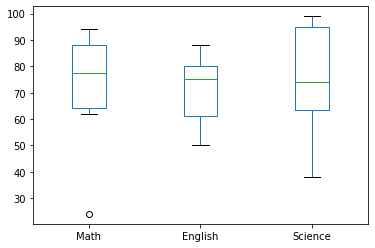

In [95]:
scores.plot.box()

* `box` メソッドで箱ひげ図を出力できる

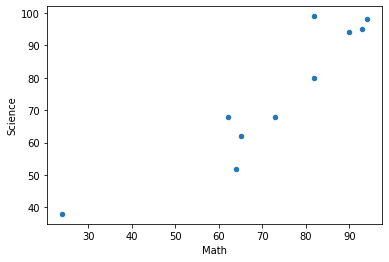

In [94]:
scores.plot.scatter(x="Math", y="Science")

* `scatter` メソッドで散布図を出力できる
* `scatter` メソッドには引数でx軸、y軸に対応する列名を指定する

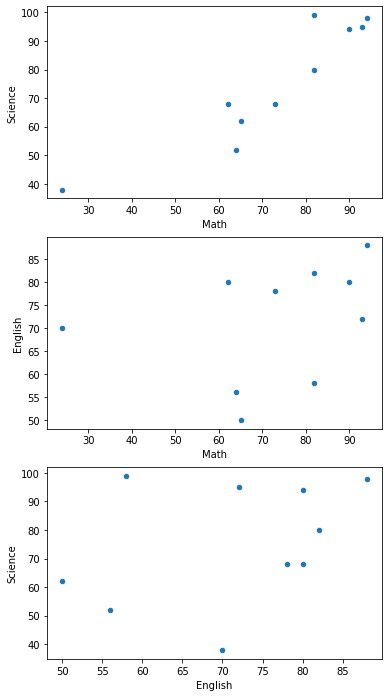

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 12))
ax1 = plt.subplot(3, 1, 1)
scores.plot.scatter(x="Math", y="Science", ax=ax1)
ax2 = plt.subplot(3, 1, 2)
scores.plot.scatter(x="Math", y="English", ax=ax2)
ax3 = plt.subplot(3, 1, 3)
scores.plot.scatter(x="English", y="Science", ax=ax3)

* `matplotlib` を直接操作して出力をカスタマイズできる
> ここでは`plt.figure(figsize=(6, 12))` メソッドによって表示サイズを横：6inch 、縦：12inchとしています。`ax1 = plt.subplot(3, 1, 1)` によって3行1列の表示区画の1つ目の区画を取得し、`scores.plot.scatter(x="Math", y="Science", ax=ax1)` によって散布図を出力しています。